In [107]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.sparse
import scipy.linalg

# Poisson Equation

Consider the Diriclet problem for the poisson equation in two dimension, $\textbf{x} = (x,y) \in \Omega \subset R^2$

$$
\begin{cases}
    - \Delta u(\textbf{x}) = f(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \Omega \\
    u(\textbf{x}) = g(\textbf{x}) \;\;\;\;\;\;\;\;\;  \textbf{x} \in \partial \Omega
\end{cases}
$$
with
$$
 \Delta u(\textbf{x}) = \frac{\partial^2 u(\textbf{x})}{\partial x^2} + \frac{\partial^2 u(\textbf{x})}{\partial y^2}
$$

# Finite difference for two dimensional problems

The idea behind finite difference relies approximating the partial derivatives that are present in the PDE by the incremental ratios computed on a suitable grid.  

The first step therefore consist of introducing computational grid. Assume for semplicity thta $\Omega$ is the rectangle $(a,b) \times (c,d)$:

- introduce a partition $[a,b]$ in subintervals $(x_k, x_{k+1})$ for $k=0, \dots, N_x$, with $x_0=a$ and $x_{N_x +1} = b$. Let us denote by $\Delta_x = {x_0,\dots, x_{N_x+1}}$ the set of end-points of such intervals and by $h_x = max (x_{k+1} - x_k)$ their maximum length.
-  introduce a discretization of the y-axis $\Delta_y = {y_0,\dots, y_{N_y+1}}$ with $y_0=c$ and $y_{N_y +1} = d$ and set $h_y = max (y_{k+1} - y_k)$
- the cartesian product $\Delta_h = \Delta_x \times \Delta_y$ provides the computational grid on $\Omega$ and $h=max \{ h_x,h_y \}$ is the charactersitic measure of the grid-size. 

Note that we the above setting with $i=1,\dots,N_x$ and $j = 1,\dots, N_y$ we indicate the internal node of the grid, while with $i=0,N_x+1$ and $j = 0,\dots, N_y+1$ the bounadry nodes

We are looking for values $u_{i,j}$ which approximate $u(x_i, y_j)$. 
 
We will assume for semplicity that the nodes be uniformly spaced, that is $h_x = h_y$. In the case of function of two variables, the second order derivative is approximated by the following incremental ratios:
$$
\delta_x^2 u_{i,j} = \frac{u_{i-1,j} -2u_{i,j}+u_{i+1,j}}{h_x^2} \\
\delta_y^2 u_{i,j} = \frac{u_{i,j-1} -2u_{i,j}+u_{i,j+1}}{h_y^2}
$$

They are second order accurate w.r.t $h_x$ and $h_y$ respectively.

Replacing it in the laplacian in the Poisson equation formula and requiring that the PDE must be satisfied in all the internal nodes of $\Delta_h$, we obtain the following set of equation:

$$
 - (\delta_x^2 u_{i,j} + \delta_y^2 u_{i,j}) = f_{i,j}  \;\;\;\;\;\;\;\;\;i=1,\dots,N_x, \;\;\;\; j= 1,\dots, N_y
$$
where $f_{i,j} = f(x_i, y_j)$
where $ \partial \Delta_h$ indicates the set of nodes belonging to the boundary $\partial \Omega$ of $\Omega$. If we make further assumption that the computational grid is uniform in both cartesian directions, $h_x=h_y=h$ we obtain

$$
 - (u_{i-1,j} + u_{i,j-1} - 4u_{i,j} + u_{i,j+1} + u_{i+1,j}) = h^2 f_{i,j}  ;\;\;\;i=1,\dots,N_x, \;\;\;\; j= 1,\dots, N_y
$$

This is called the __five point scheme for the Laplace operator__.
We note that the unknown associated with the boundary nodes can be eleminated using the diriclet condition and therefore the above system involves only $N = N_x N_y$ unknowns.

We must add the equations that enforce the diriclet data at the boundary, which are
$$
    u_{i,j} = g_{i,j} \;\;\;\;\;\; \forall i,j \;\;s.t \;\;(x_i, x_j) \in \partial \Delta_h
$$

## Matrix form
Numerating the node from left to right and from top to bottom, we obtain a system of the form
$$
A\textbf{u}_h = h^2 \textbf{r}
$$
where 
- $A \in R^{N \times N}$ tridiagonal block matrix made of the following block

$$
    A = 
 \begin{pmatrix}
T & I &  &  &  & &  \\
I & T & I &  &  &  &\  \\
 &  &  &\ddots & & & \\
 &  &  &  I & T & I  \\
 &  &  &  & I & T & I \\
 &  &  &  &  & I & T 
\end{pmatrix}
$$
 here $I \in R^{N_x \times N_x}$ is an identity matrix and $T \in R^{N_x \times N_x}$ is a tridiagonal matrix

$$
    T =
\begin{pmatrix}
4 & 1 &  &  &  & &  \\
1 & 4 & 1 &  &  &  &\  \\
 &  &  &\ddots & & & \\
 &  &  &  1 & 4 & 1 \\
 &  &  &  & 1 & 4 & 1 \\
 &  &  &  &  & 1 & 4 
\end{pmatrix}

$$
A is symmetric, positive definite and so non singular. Thus we can cocnlude that the finite difference system admits admits an unique solution $\textbf{u}_h$. 
It is worth pointing out that $A$ is ill-conditioned: it is condition number grows like $h^{-2}$ as $h$ tends to zero.

- $\textbf{u}_h \in R^N $ is our unknown solution
$$
    \textbf{u}_h = 
    \begin{pmatrix}
        u_{1,1} \\
        u_{1,2} \\
        \vdots \\
        u_{1,Ny} \\
        u_{2,1} \\
        \vdots \\
        u_{2,Ny} \\
        \vdots \\
        u_{Nx,1} \\
        \vdots \\
        u_{Nx,Ny} \\
    \end{pmatrix}
$$

- $\textbf{r} = -h^2 \textbf{f} - \textbf{bx} - \textbf{by}\in R^N$ where $\textbf{bx}$ and $\textbf{by}$ are the vector of left/right and lower/upper boundary condition
$$
    \textbf{r} = 
    \begin{pmatrix}
        r_{1,1} \\
        r_{1,2} \\
        \vdots \\
        r_{1,Ny} \\
        r_{2,1} \\
        \vdots \\
        r_{2,Ny} \\
        \vdots \\
        r_{Nx,1} \\
        \vdots \\
        r_{Nx,Ny} \\
    \end{pmatrix}
$$

## Example

Consider the following problem setting 
$$ 
\Omega = (0,1)^2 \\    
f(x,y) = 8\pi sin(2\pi x)*cos(2\pi y) \\    
g(0,y) = g(1,y) = 0 \\  
g(x,0) =g(x,1) = sin(2\pi x) \;\;\; 0<x<1  
$$

In [226]:
# Compute A
def compute_A(a, b, c, d, n_x, n_y):
    # Uniform grid assumption
    h = (b-a)/n_x 

    D = np.eye(n_x)
    k = [np.ones(n_x-1),4*np.ones(n_x), np.ones(n_x-1)]
    T = scipy.sparse.diags(k, [-1,0,1]).toarray()

    I1 = np.eye(n_y)
    I2 = np.eye(n_y, k=1)
    I3 = np.eye(n_y, k=-1)

    A1 = np.kron(I1, T)
    A2 = np.kron(I2, D)
    A3 = np.kron(I3, D)
    A = A1 + A2 + A3

    return A

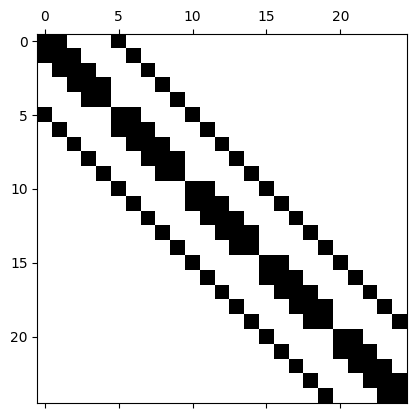

In [227]:
plt.spy(compute_A(0,1,0,1, 5,5))

In [102]:
def poisson_finite_difference_solver(a,b,c,d, n_x, n_y, f, g):
    
    A = compute_A(a,b,c,d, n_x, n_y,)

# Some code

In [157]:
# To compute the vector f: define the function, define the grid, evalutae the function in the grid, build f accordingly
n_x = 20
n_y = 20
a = 0
b = 1
c = 0
d = 1

def f(x,y):
    return 8*np.pi**2*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)


def g(x,y, boundary_point):
    if (x == 0 or x == 1):
        return 0
    if (y == 0 or y == 1) and ():
        return np.sin(2*np.pi*x)
    return 0


x = np.linspace(a, b, n_x)
y = np.linspace(c, d, n_y)
xv, yv = np.meshgrid(x, y)

z = f(xv, yv)
    

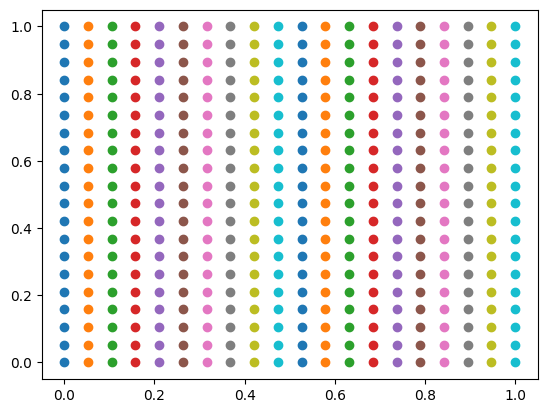

In [120]:
# Plot the grid
plt.plot(xv, yv, marker='o', linestyle='none')

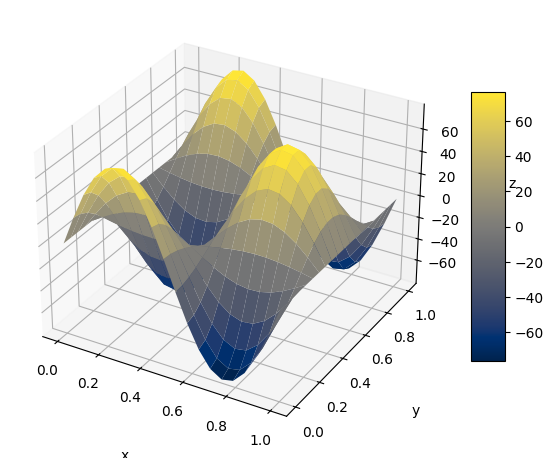

In [141]:
# Plot the function f
z = f(xv, yv)
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

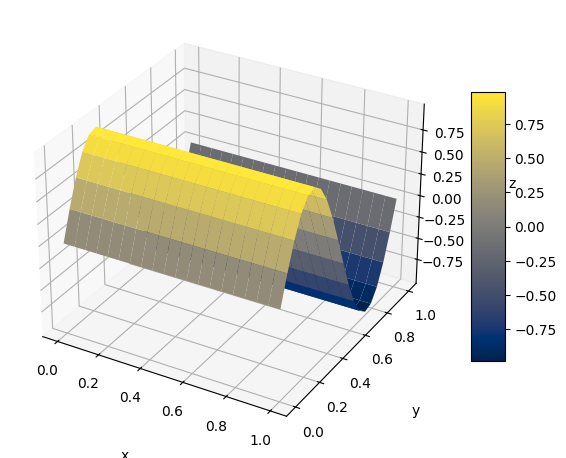

In [161]:
# Plot the function g
z1 = np.zeros((n_x, n_y))
for i in np.arange(n_x):
    for j in np.arange(n_y):
        z1[i,j] = g(x[i], y[j])
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xv, yv, z1, cmap = plt.cm.cividis)
# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()

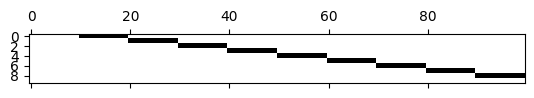

In [196]:
plt.spy(compute_A(0,1,0,1, 10,10))

In [134]:
# compute f
F = np.zeros(n_x*n_y)

for i in np.arange(n_x):
    for j in np.arange(n_y):
        F[(i*n_y+j)] = f(x[i], y[i])

F[0] = f(x[0], y[0]) + 

In [180]:
def boundary_condition(x, y, n_x, n_y, boundary_points):
    boundary_values = np.zeros((n_x, n_y))
    for i in np.arange(n_x):
        for j in np.arange(n_y):
            if (x[i], y[j]) in boundary_points:
                boundary_values[x[i], y[j]]  = g(x[i], y[i])
            else:
                boundary_values[x[i], y[j]]  = None
    return boundary_values

def g(x,y):
    if (x == 0 or x == 1):
        return 0
    if (y == 0 or y == 1) and ():
        return np.sin(2*np.pi*x)
    return 0

# Example usage
boundary_points = [(0, 0), (1, 0), (2, 0), (0, 1), (2, 1), (0, 2), (1, 2), (2, 2)]

boundary_values = boundary_condition(x, y,n_x,n_y, boundary_points)
print(boundary_values)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [179]:
np.zeros((5,2)).shape

(5, 2)

# Rereferences:
- Scientific Computing with MATLAB and Octave, A.Quarteroni, F.Saleri
- https://john-s-butler-dit.github.io/NumericalAnalysisBook/Chapter%2009%20-%20Elliptic%20Equations/903_Poisson%20Equation-Boundary.html